## 📘 Business Case
Accurate rainfall forecasting is critical for agriculture, flood planning, and infrastructure management. This project predicts:
- Total monthly rainfall for the next 12 months
- Max daily rainfall for each month
Using historical data from Changi Climate Station (1982–2020) and Prophet time-series modeling.


In [ ]:
#pip install prophet

#1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


#2. Load Data

In [3]:
monthly_total = pd.read_csv('/content/rainfall-monthly-total.csv')
peak_daily = pd.read_csv('/content/rainfall-monthly-highest-daily-total.csv')

monthly_total['month'] = pd.to_datetime(monthly_total['month'])
peak_daily['month'] = pd.to_datetime(peak_daily['month'])

monthly_total = monthly_total.sort_values('month')
peak_daily = peak_daily.sort_values('month')


3. Feature Engineering

In [4]:
monthly_total['month_num'] = monthly_total['month'].dt.month
monthly_total['lag_1'] = monthly_total['total_rainfall'].shift(1)
monthly_total['lag_2'] = monthly_total['total_rainfall'].shift(2)

peak_daily['month_num'] = peak_daily['month'].dt.month
peak_daily['lag_1'] = peak_daily['maximum_rainfall_in_a_day'].shift(1)
peak_daily['lag_2'] = peak_daily['maximum_rainfall_in_a_day'].shift(2)

monthly_total.dropna(inplace=True)
peak_daily.dropna(inplace=True)


4. Prophet Model: Monthly Total Rainfall

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7a0zkwky/ozh1knra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7a0zkwky/af12ifos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43989', 'data', 'file=/tmp/tmp7a0zkwky/ozh1knra.json', 'init=/tmp/tmp7a0zkwky/af12ifos.json', 'output', 'file=/tmp/tmp7a0zkwky/prophet_model8_irozpw/prophet_model-20250607154317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


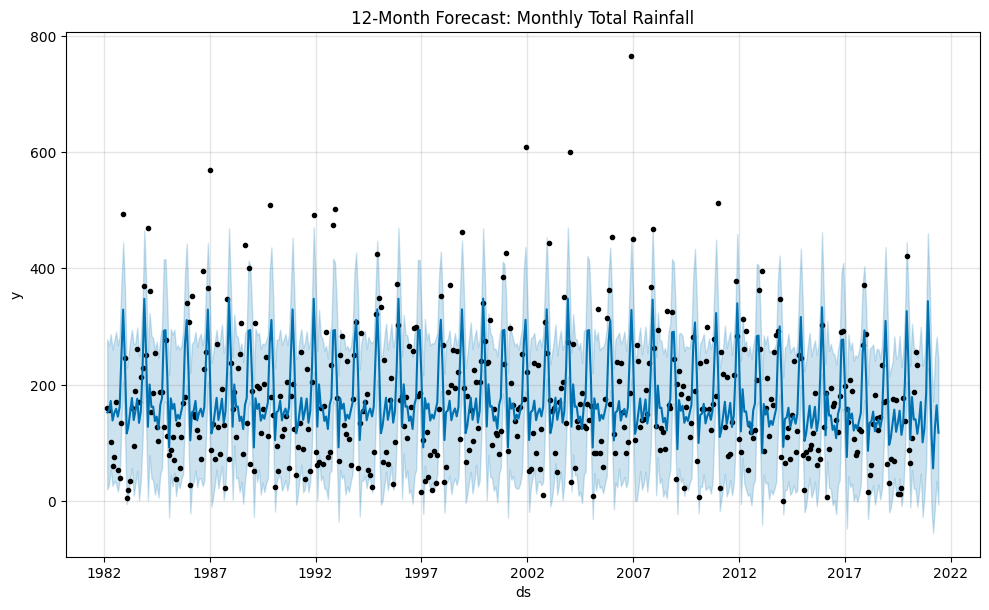

In [5]:
df_prophet_total = monthly_total[['month', 'total_rainfall']].rename(columns={'month': 'ds', 'total_rainfall': 'y'})

model_total = Prophet()
model_total.fit(df_prophet_total)

future_total = model_total.make_future_dataframe(periods=12, freq='M')
forecast_total = model_total.predict(future_total)

model_total.plot(forecast_total)
plt.title("12-Month Forecast: Monthly Total Rainfall")
plt.show()


5. Prophet Model: Peak Daily Rainfall

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7a0zkwky/tvagnxrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7a0zkwky/g92fhsxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8350', 'data', 'file=/tmp/tmp7a0zkwky/tvagnxrr.json', 'init=/tmp/tmp7a0zkwky/g92fhsxx.json', 'output', 'file=/tmp/tmp7a0zkwky/prophet_model1wwcggxq/prophet_model-20250607154328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


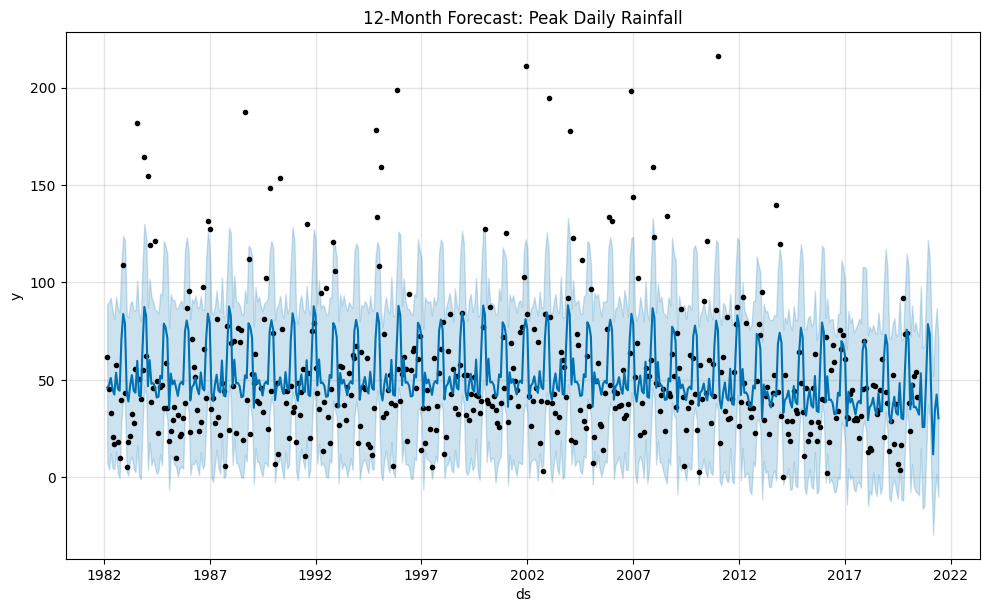

In [6]:
df_prophet_peak = peak_daily[['month', 'maximum_rainfall_in_a_day']].rename(columns={'month': 'ds', 'maximum_rainfall_in_a_day': 'y'})

model_peak = Prophet()
model_peak.fit(df_prophet_peak)

future_peak = model_peak.make_future_dataframe(periods=12, freq='M')
forecast_peak = model_peak.predict(future_peak)

model_peak.plot(forecast_peak)
plt.title("12-Month Forecast: Peak Daily Rainfall")
plt.show()


6. Evaluation

In [9]:
# Calculate RMSE by taking the square root of MSE

# Define the actual and predicted values for total rainfall
# Assuming y_true_total should be the actual values from the original data
y_true_total = df_prophet_total['y'].values
# Assuming y_pred_total should be the predicted values from the forecast, aligning with the length of actual values
# We need to ensure the forecast and actual values align in time.
# For a basic evaluation, we can compare the predicted values from the forecast
# that correspond to the time points in the original df_prophet_total.
# This is a simplified approach for demonstration. A more robust evaluation
# would typically involve splitting the data into training and test sets.
# For now, let's align the forecast with the original data points.
# We'll take the first len(y_true_total) predictions from forecast_total
y_pred_total = forecast_total['yhat'].iloc[:len(y_true_total)].values


rmse_total = np.sqrt(mean_squared_error(y_true_total, y_pred_total))
mae_total = mean_absolute_error(y_true_total, y_pred_total)

print(f'Total Rainfall - RMSE: {rmse_total:.2f}, MAE: {mae_total:.2f}')

# Calculate RMSE for peak rainfall as well
# Define the actual and predicted values for peak daily rainfall
y_true_peak = df_prophet_peak['y'].values
# Align the forecast with the original data points for peak rainfall
y_pred_peak = forecast_peak['yhat'].iloc[:len(y_true_peak)].values


rmse_peak = np.sqrt(mean_squared_error(y_true_peak, y_pred_peak))
mae_peak = mean_absolute_error(y_true_peak, y_pred_peak)

print(f'Peak Daily Rainfall - RMSE: {rmse_peak:.2f}, MAE: {mae_peak:.2f}')

Total Rainfall - RMSE: 95.96, MAE: 73.50
Peak Daily Rainfall - RMSE: 32.23, MAE: 22.88


7. Export Forecasts

In [10]:
forecast_total[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_total_rainfall_prophet.csv', index=False)
forecast_peak[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_peak_rainfall_prophet.csv', index=False)


8. Conclusion

###  Conclusion
####- Forecasts were generated using Facebook Prophet, which models seasonality and trends.
####- Feature engineering helped make the model more context-aware.
####- Output includes confidence intervals and can be saved for reporting or further analysis.
####- Next steps can include: multivariate models, LSTM-based forecasting, or daily-level modeling.


## 🧗 Challenges Faced
- Limited data beyond 2020
- High seasonality in rainfall trends
- Sharp peaks in daily rainfall were harder to predict accurately
- Lack of multivariate features like humidity, temperature, etc.
